<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

# Opening Restaurant in Paulínia, São Paulo, Brazil

## 1. Business Problem

According to FourSquare API, there are more than 200 restaurants in Paulínia and about 112,003 people (2020). That is why opening a new restaurant there can be an extremely challenging task. Choosing a restaurant type and a good spot, an entrepreneur usually carelessly relies on common sense and domain knowledge. Needless to say that too often an inconsiderate decision leads to a poor income and inevitable bankruptcy. According to several surveys, up to 40% of such start-ups fail in the very first year. Let's suppose, an investor has enough time and money, as well as a passion to open the best eating spot in Paulínia. What type of restaurant would it be? What would be the best place for it? Is there a better way to answer these questions rather than guessing?  
What if there is a way to cluster city neighborhoods, based on their near-by restaurant similarity? What if we can visualize these clusters on a map? What if we might find what type of restaurant is the most and least popular in each location? Equipped with that knowledge, we might be able to make a smart choice from a huge number of restaurant types and available places.  
Let us allow machine learning to get the job done. Using reliable venue data, it can investigate the city neighborhoods, and show us unseen dependencies. Dependencies that we are not aware of.


**Target audience:** investors, entrepreneurs, and chefs interested in opening a restaurant in Paulínia, who may need a piece of objective advice of what type of restaurant would be more successful and where exactly it should be opened.

## 2. Data

**Step 1.** Using a list on https://cepbrasil.org/sao-paulo/paulinia, collect information about Paulínia boroughs.  
**Step 2.** Use the Geopy and Folium library to get the coordinates of every locations and map geospatial data on a Paulínia map.  
**Step 3.** Using Foursquare API, collect the top 100 restaurants and their categories for each location within a radius 500 meters.  
**Step 4.** Group collected restaurants by location and by taking the mean of the frequency of occurrence of each type, preparing them for clustering.   
**Step 5.** Cluster restaurants by k-means algorithm and analyze the top 10 most common restaurants in each cluster.    
**Step 6.** Visualize clusters on the map, thus showing the best locations for opening the chosen restaurant.

## 3. Methodology

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import time # for time delay while working with API

import requests # library to handle requests

from bs4 import BeautifulSoup
import csv # library to parse webpages

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Convert an address into latitude and longitude values
!pip install geopy
from geopy.geocoders import Nominatim

!pip install geocoder
import geocoder # to get longitude and latitude

import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# k-means from clustering stage
from sklearn.cluster import KMeans

# Map rendering library
!conda install -c conda-forge folium=0.5.0
import folium

# regular expressions
import re

Solving environment: done

# All requested packages already installed.



### 3.1. Collecting Paulínia Neighborhoods

Let's create a webscrapping script to collect Paulínia neighborhoods information from the list on https://cepbrasil.org/sao-paulo/paulinia.

In [2]:
# Download the webpage
url = 'https://cepbrasil.org/sao-paulo/paulinia'
data = requests.get(url).text

In [3]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
#Getting a tag html with Neighborhood 
find_el = soup.find_all('h4', class_="title")

In [5]:
#Extrating the name of Neighborhood 
Neighborhood=[]
for r in find_el:
        #print(r.text)
        Neighborhood.append(r.text)

In [6]:
#Wrinting results in csv file using pandas
df=pd.DataFrame(Neighborhood)
df.columns =['Neighborhood']
df.to_csv('paulinia.csv',index=False)

In [7]:
paulinia_raw = pd.read_csv('paulinia.csv')

In [8]:
paulinia_raw.shape

(38, 1)

In [9]:
paulinia_raw

,Neighborhood
0,Alto de Pinheiros
1,Balneário Tropical
2,Bela Vista
3,Betel
4,Boa Esperança
5,Bonfim
6,Cascata
7,Dona Edith Campos Fávero
8,Jardim América
9,Jardim de Itapoan


### 3.2. Adding Coordinates

In order to utilize the Foursquare location data, we need to get latitude and longitude coordinates for each neighborhood in the dataframe.  
We will use the geopy library for that purpose. Let's try with the first neighborhood that is Alto de Pinheiros, Paulínia.

In [10]:
# Using geocoder
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighborhoods table
neighborhoods = paulinia_raw['Neighborhood']

# Store latitude and longitude values in lat and lng
for nh in neighborhoods:
    g = geocoder.arcgis('{}, Paulínia, São Paulo, Brazil'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [11]:
paulinia_data = paulinia_raw
paulinia_data['Latitude'] = lat
paulinia_data['Longitude'] = lng

In [12]:
paulinia_data

,Neighborhood,Latitude,Longitude
0,Alto de Pinheiros,-22.73918,-47.17809
1,Balneário Tropical,-22.75627,-47.18508
2,Bela Vista,-22.75386,-47.16820
3,Betel,-22.80440,-47.12501
4,Boa Esperança,-22.75829,-47.13802
5,Bonfim,-22.69969,-47.14288
6,Cascata,-22.73033,-47.16635
7,Dona Edith Campos Fávero,-22.74742,-47.18221
8,Jardim América,-22.77135,-47.14703
9,Jardim de Itapoan,-22.76366,-47.14783


# Well done! Now we are ready to apply a for loop to go through all addresses in the dataframe and get the corresponding coordinates.

In [13]:
# Get the Paulínia "central" point
from geopy.geocoders import Nominatim
address = 'Paulínia, São Paulo, Brazil'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paulínia, São Paulo, Brazil are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paulínia, São Paulo, Brazil are -22.7630391, -47.1532213.


In [14]:
# create map of Paulínia using starting point coordinates
paulinia_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(paulinia_data['Latitude'], paulinia_data['Longitude'], paulinia_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(paulinia_map)
    
paulinia_map

## 4. Exploring Paulínia Restaurants

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### 4.1. Collecting Restaurants

In [15]:
#Let's setup FourSquare credentials
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


In [16]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
explore_df_list = []

for i, nhood_name in enumerate(paulinia_data['Neighborhood']):  
    
    try :
        #Get neighborhood data
        nhood_name = paulinia_data.loc[i, 'Neighborhood']
        nhood_lat = paulinia_data.loc[i, 'Latitude']
        nhood_lng = paulinia_data.loc[i, 'Longitude']

        radius = 500 
        LIMIT = 100 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)
       


        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    
        
        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/tmp/wsuser/ipykernel_31742/651726970.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby = json_normalize(results) # Flatten JSON


In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6238ab4425fd834f32505d7a'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '-22.769800,-47.160650', 'radius': '500'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'headerLocation': 'Paulínia',
  'headerFullLocation': 'Paulínia',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': -22.76529999549997,
    'lng': -47.155778769256294},
   'sw': {'lat': -22.77430000449998, 'lng': -47.16552123074366}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e0f8e01a8099e152613f941',
       'name': 'Supermercado Calega

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/tmp/wsuser/ipykernel_31742/1613792069.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Supermercado Calegaris,Grocery Store,-22.769851,-47.163810
1,Loterica Cantinho da Sorte,Lottery Retailer,-22.770816,-47.158591
2,Villa D'Oro,Pizza Place,-22.772368,-47.160386
3,Academia Flexus,Gym / Fitness Center,-22.772494,-47.159148


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


Let's create a function to repeat the same process to all the neighborhoods in Paulínia.

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={0}&client_secret={1}&v={2}&ll={3},{4}&radius={5}&limit={6}&query=restaurant'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            #v['venue']['location']['lat'], 
            #v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  #'Venue Latitude', 
                  #'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now run the above function on each neighborhood and create a new dataframe called *paulinia_venues*.

In [23]:
paulinia_venues = getNearbyVenues(names=paulinia_data['Neighborhood'],
                                   latitudes=paulinia_data['Latitude'],
                                   longitudes=paulinia_data['Longitude']
                                  )

Let's check the size of the resulting dataframe.

In [24]:
print(paulinia_venues.shape)
paulinia_venues.head()

(172, 5)


,Neighborhood,Latitude,Longitude,Venue,Venue Category
0,Alto de Pinheiros,-22.73918,-47.17809,Sandioli Hamburgeria E Pizzaria,Burger Joint
1,Alto de Pinheiros,-22.73918,-47.17809,Buffet Primavera,Food Court
2,Balneário Tropical,-22.75627,-47.18508,Massas E Pastéis Yamada,Food Truck
3,Balneário Tropical,-22.75627,-47.18508,Churrascaria Novilha de Ouro,Steakhouse
4,Bela Vista,-22.75386,-47.16820,subway,Sandwich Place


Let's check how many restaurants were returned for each neighborhood.

In [25]:
paulinia_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count()

,Venue
Neighborhood,
Alto de Pinheiros,2
Balneário Tropical,2
Bela Vista,4
Betel,1
Cascata,1
Dona Edith Campos Fávero,3
Jardim América,19
Jardim Flamboyant,3
Jardim Fortaleza,4


And check if Foursquare API did not return restaurants for some locations.

In [26]:
x = paulinia_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().shape[0]
y = paulinia_data.shape[0]
empty_locations = []
if x != y:
    print('Missing data for {0} locations:'.format(y-x))
    # And print them
    for i in range(paulinia_data.shape[0]):
        loc = paulinia_data.iloc[i,0]
        k = 0
        for j in range(paulinia_venues.shape[0]):
            if loc == paulinia_venues.iloc[j,0]:
                k += 1
        if k == 0:
            print(i,loc)
            empty_locations.append(loc)

Missing data for 9 locations:
4 Boa Esperança
5 Bonfim
13 Jardim Harmonia
18 Loteamento Terras do Cancioneiro
22 Nova Veneza
24 Parque Brasil 500
27 Recanto dos Pássaros
30 Santa Terezinha
31 São Bento


Let's find out how many unique categories can be curated from all the returned restaurants.

In [27]:
print('There are {0} uniques categories.'.format(len(paulinia_venues['Venue Category'].unique())))

There are 32 uniques categories.


### 4.2. Exploring Restaurants

To begin analisys we need to transform collected information using the one-hot encoding method.

In [28]:
# one hot encoding
paulinia_onehot = pd.get_dummies(paulinia_venues[['Venue Category']], prefix="", prefix_sep="")

# add location column back to dataframe
paulinia_onehot['Neighborhood'] = paulinia_venues['Neighborhood'] 

# move location column to the first column
fixed_columns = [paulinia_onehot.columns[-1]] + list(paulinia_onehot.columns[:-1])
paulinia_onehot = paulinia_onehot[fixed_columns]

paulinia_onehot.head()

,Neighborhood,Acai House,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Café,Churrascaria,Deli / Bodega,Diner,Dumpling Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Gastropub,Hot Dog Joint,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pastelaria,Pizza Place,Restaurant,Sandwich Place,Snack Place,Southeastern Brazilian Restaurant,Steakhouse,Vegetarian / Vegan Restaurant
0,Alto de Pinheiros,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alto de Pinheiros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Balneário Tropical,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Balneário Tropical,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Bela Vista,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


And let's examine the new dataframe size.

In [29]:
paulinia_onehot.shape

(172, 33)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category preparing the dataframe for clustering.

In [30]:
paulinia_grouped = paulinia_onehot.groupby('Neighborhood').mean().reset_index()
paulinia_grouped

,Neighborhood,Acai House,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Café,Churrascaria,Deli / Bodega,Diner,Dumpling Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Gastropub,Hot Dog Joint,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pastelaria,Pizza Place,Restaurant,Sandwich Place,Snack Place,Southeastern Brazilian Restaurant,Steakhouse,Vegetarian / Vegan Restaurant
0,Alto de Pinheiros,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Balneário Tropical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000
2,Bela Vista,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.250000,0.250000,0.000000,0.000000,0.0,0.000000
3,Betel,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,Cascata,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Dona Edith Campos Fávero,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,Jardim América,0.052632,0.052632,0.052632,0.000000,0.052632,0.105263,0.000000,0.0,0.052632,0.052632,0.052632,0.052632,0.052632,0.000000,0.052632,0.000000,0.0,0.000000,0.00,0.000000,0.052632,0.000000,0.000000,0.000000,0.0,0.210526,0.000000,0.052632,0.052632,0.000000,0.0,0.000000
7,Jardim Flamboyant,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Jardim Fortaleza,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,Jardim Planalto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0.0,0.000000


Let's confirm the new size.

In [31]:
paulinia_grouped.shape

(29, 33)

Let's investigate each neighborhood along with the top 5 most common venues.

In [32]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paulinia_grouped['Neighborhood']

for ind in np.arange(paulinia_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paulinia_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto de Pinheiros,Food Court,Burger Joint,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
1,Balneário Tropical,Steakhouse,Food Truck,Acai House,Asian Restaurant,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
2,Bela Vista,Bakery,Sandwich Place,Restaurant,Pizza Place,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Pastelaria
3,Betel,BBQ Joint,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
4,Cascata,Buffet,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
5,Dona Edith Campos Fávero,Bakery,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
6,Jardim América,Pizza Place,Brazilian Restaurant,Acai House,Café,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Diner,Deli / Bodega,Churrascaria
7,Jardim Flamboyant,Hot Dog Joint,Bakery,Dumpling Restaurant,Acai House,Pastelaria,Gastropub,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pizza Place
8,Jardim Fortaleza,Food Truck,Brazilian Restaurant,Pizza Place,Japanese Restaurant,Acai House,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant
9,Jardim Planalto,Sandwich Place,Restaurant,Burger Joint,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Pizza Place,Pastelaria


### 4.3. Clustering Restaurants

Now we will apply K-means clustering on the dataframe.

In [34]:
paulinia_grouped_clustering = paulinia_grouped.drop('Neighborhood', 1)

/tmp/wsuser/ipykernel_31742/3792700857.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  paulinia_grouped_clustering = paulinia_grouped.drop('Neighborhood', 1)


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [36]:
# Silhouette method of interpretation and validation of consistency within clusters of data. 
# The technique provides a succinct graphical representation of how well each object has been classified

max_range = 20 # Max range 20 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for paulinia_clusters in range(2, max_range) :
    
    # Run k-means clustering
    paulinia_gc = paulinia_grouped_clustering
    kmeans = KMeans(n_clusters = paulinia_clusters, init = 'k-means++', random_state = 0).fit_predict(paulinia_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(paulinia_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(paulinia_clusters)
    scores.append(score)

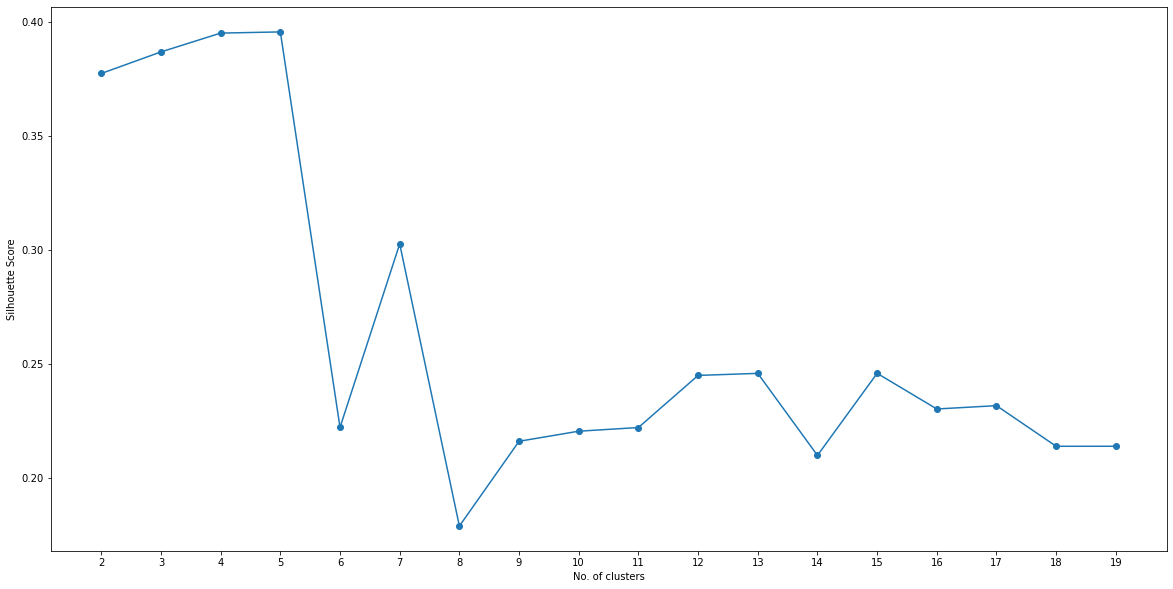

In [37]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

From the graph the optimal number is found to be 8

In [38]:
# set number of clusters based on optimal number
opt_value = 8

Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering. Run *k*-means to cluster the neighborhood into 8 clusters.

In [39]:
paulinia_clusters = opt_value

# Run k-means clustering
paulinia_gc = paulinia_grouped_clustering
kmeans = KMeans(n_clusters = paulinia_clusters, init = 'k-means++', random_state = 0).fit(paulinia_gc)

# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

##### Let's create a new dataframe that includes the clusters as well as the top 10 venues for each neighborhood.  
Do not forget that some location didn't get any data from Foursquare API, and we put them to the list.  
Therfore we are forced to exclude them from the resulting dataset.

In [40]:
paulinia_merged = paulinia_data

# Substitute all empty locations by NAN
for loc in empty_locations:
    paulinia_merged = paulinia_merged.replace(loc, np.nan)

# merge paulinia_grouped with paulinia_data to add latitude/longitude for each neighborhood
paulinia_merged = paulinia_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# then drop all rows containing NAN
paulinia_merged.dropna(subset=['Neighborhood'], axis=0, inplace=True)
paulinia_merged.reset_index(drop=True, inplace=True)
print('Now the cluster dataframe has {0} data rows.'.format(paulinia_merged.shape[0]))

# add clustering labels
paulinia_merged['Cluster Labels'] = paulinia_merged['Cluster Labels'].astype(int)
paulinia_merged.head()

Now the cluster dataframe has 29 data rows.


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto de Pinheiros,-22.73918,-47.17809,7,Food Court,Burger Joint,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
1,Balneário Tropical,-22.75627,-47.18508,5,Steakhouse,Food Truck,Acai House,Asian Restaurant,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
2,Bela Vista,-22.75386,-47.16820,6,Bakery,Sandwich Place,Restaurant,Pizza Place,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Pastelaria
3,Betel,-22.80440,-47.12501,3,BBQ Joint,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
4,Cascata,-22.73033,-47.16635,4,Buffet,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria


## 5. Results

And now we are ready to conclude our report.

### 5.1. Examine Clusters

Let's examine each cluster and the discriminating restaurant categories that distinguish a cluster.

#### Cluster 1 (Cluster Label 0)

In [41]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 0, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Jardim de Itapoan,0,Bakery,Café,Burger Joint,Food Truck,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Restaurant,Hot Dog Joint,BBQ Joint
9,Jardim Flamboyant,0,Hot Dog Joint,Bakery,Dumpling Restaurant,Acai House,Pastelaria,Gastropub,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pizza Place
13,Jardim Ypê,0,Brazilian Restaurant,Café,Fast Food Restaurant,Acai House,Hot Dog Joint,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pastelaria,Pizza Place
14,João Aranha,0,Bakery,Pizza Place,Food,Restaurant,Middle Eastern Restaurant,Gastropub,Hot Dog Joint,Italian Restaurant,Japanese Restaurant,Acai House
16,Nossa Senhora Aparecida,0,Brazilian Restaurant,Acai House,Bagel Shop,Bakery,Snack Place,Churrascaria,Pastelaria,Hot Dog Joint,Italian Restaurant,Japanese Restaurant
17,Nova Paulínia,0,Brazilian Restaurant,Pizza Place,Fast Food Restaurant,Bakery,Burger Joint,Restaurant,Acai House,Diner,Hot Dog Joint,Food Truck
22,Santa Cecília,0,Burger Joint,Acai House,Bagel Shop,Southeastern Brazilian Restaurant,Brazilian Restaurant,Fast Food Restaurant,Japanese Restaurant,Pizza Place,Middle Eastern Restaurant,Hot Dog Joint
24,São Luiz,0,Asian Restaurant,Bakery,Brazilian Restaurant,Sandwich Place,Pastelaria,Gastropub,Hot Dog Joint,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant
25,Vila Bressani,0,Bakery,Brazilian Restaurant,Pizza Place,Bagel Shop,Southeastern Brazilian Restaurant,Asian Restaurant,Burger Joint,Food,Fast Food Restaurant,Acai House
27,Vila Monte Alegre,0,Bakery,Burger Joint,Hot Dog Joint,Snack Place,Dumpling Restaurant,Middle Eastern Restaurant,Pastelaria,Italian Restaurant,Japanese Restaurant,Acai House


In [42]:
cluster_1 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 0, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_1.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,10,10.0,10,10,10,10,10,10,10,10,10,10
unique,10,NaN,5,6,8,8,9,8,7,8,6,7
top,Jardim de Itapoan,NaN,Bakery,Café,Fast Food Restaurant,Acai House,Pastelaria,Gastropub,Japanese Restaurant,Italian Restaurant,Japanese Restaurant,Acai House
freq,1,NaN,4,2,2,2,2,3,2,3,3,3
mean,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cluster 2 (Cluster Label 1)

In [43]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 1, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Jardim Vista Alegre,1,Snack Place,Acai House,Asian Restaurant,Steakhouse,Southeastern Brazilian Restaurant,Sandwich Place,Restaurant,Pizza Place,Pastelaria,Middle Eastern Restaurant
20,Parque da Represa,1,Snack Place,Acai House,Asian Restaurant,Steakhouse,Southeastern Brazilian Restaurant,Sandwich Place,Restaurant,Pizza Place,Pastelaria,Middle Eastern Restaurant
21,Saltinho,1,Snack Place,Acai House,Asian Restaurant,Steakhouse,Southeastern Brazilian Restaurant,Sandwich Place,Restaurant,Pizza Place,Pastelaria,Middle Eastern Restaurant
23,São Domingos,1,Snack Place,Acai House,Asian Restaurant,Steakhouse,Southeastern Brazilian Restaurant,Sandwich Place,Restaurant,Pizza Place,Pastelaria,Middle Eastern Restaurant


In [44]:
cluster_2 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 1, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_2.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,4,4.0,4,4,4,4,4,4,4,4,4,4
unique,4,NaN,1,1,1,1,1,1,1,1,1,1
top,Jardim Vista Alegre,NaN,Snack Place,Acai House,Asian Restaurant,Steakhouse,Southeastern Brazilian Restaurant,Sandwich Place,Restaurant,Pizza Place,Pastelaria,Middle Eastern Restaurant
freq,1,NaN,4,4,4,4,4,4,4,4,4,4
mean,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cluster 3 (Cluster Label 2)

In [45]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 2, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Dona Edith Campos Fávero,2,Bakery,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria


In [46]:
cluster_3 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 2, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_3.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,1,1.0,1,1,1,1,1,1,1,1,1,1
unique,1,NaN,1,1,1,1,1,1,1,1,1,1
top,Dona Edith Campos Fávero,NaN,Bakery,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
freq,1,NaN,1,1,1,1,1,1,1,1,1,1
mean,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cluster 4 (Cluster Label 3)

In [47]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 3, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Betel,3,BBQ Joint,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria


In [48]:
cluster_4 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 3, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_4.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,1,1.0,1,1,1,1,1,1,1,1,1,1
unique,1,NaN,1,1,1,1,1,1,1,1,1,1
top,Betel,NaN,BBQ Joint,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
freq,1,NaN,1,1,1,1,1,1,1,1,1,1
mean,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cluster 5 (Cluster Label 4)

In [49]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 4, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Cascata,4,Buffet,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria


In [50]:
cluster_5 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 4, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_5.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,1,1.0,1,1,1,1,1,1,1,1,1,1
unique,1,NaN,1,1,1,1,1,1,1,1,1,1
top,Cascata,NaN,Buffet,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
freq,1,NaN,1,1,1,1,1,1,1,1,1,1
mean,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cluster 6 (Cluster Label 5)

In [51]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 5, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Balneário Tropical,5,Steakhouse,Food Truck,Acai House,Asian Restaurant,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria


In [52]:
cluster_6 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 5, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_6.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,1,1.0,1,1,1,1,1,1,1,1,1,1
unique,1,NaN,1,1,1,1,1,1,1,1,1,1
top,Balneário Tropical,NaN,Steakhouse,Food Truck,Acai House,Asian Restaurant,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
freq,1,NaN,1,1,1,1,1,1,1,1,1,1
mean,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cluster 7 (Cluster Label 6)

In [53]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 6, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bela Vista,6,Bakery,Sandwich Place,Restaurant,Pizza Place,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Pastelaria
6,Jardim América,6,Pizza Place,Brazilian Restaurant,Acai House,Café,Asian Restaurant,Fast Food Restaurant,Sandwich Place,Diner,Deli / Bodega,Churrascaria
8,Jardim dos Calegaris,6,Brazilian Restaurant,Snack Place,Pizza Place,Restaurant,Gastropub,Bakery,Middle Eastern Restaurant,Hot Dog Joint,Italian Restaurant,Japanese Restaurant
10,Jardim Fortaleza,6,Food Truck,Brazilian Restaurant,Pizza Place,Japanese Restaurant,Acai House,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant
11,Jardim Planalto,6,Sandwich Place,Restaurant,Burger Joint,Acai House,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Pizza Place,Pastelaria
15,Morumbi,6,Burger Joint,Pizza Place,Churrascaria,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Deli / Bodega,Café,Snack Place,BBQ Joint,Hot Dog Joint
18,Parque Bom Retiro,6,French Restaurant,Fast Food Restaurant,Diner,Restaurant,Middle Eastern Restaurant,Gastropub,Hot Dog Joint,Italian Restaurant,Japanese Restaurant,Acai House
19,Parque da Figueira,6,BBQ Joint,Snack Place,Breakfast Spot,Acai House,Pastelaria,Gastropub,Hot Dog Joint,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant
26,Vila José Paulino Nogueira,6,Snack Place,Restaurant,Pizza Place,Acai House,Asian Restaurant,Steakhouse,Southeastern Brazilian Restaurant,Sandwich Place,Pastelaria,Middle Eastern Restaurant
28,Vila Presidente Médici,6,Pizza Place,Snack Place,Pastelaria,Gastropub,Acai House,Asian Restaurant,Steakhouse,Southeastern Brazilian Restaurant,Sandwich Place,Restaurant


In [54]:
cluster_7 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 6, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_7.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,10,10.0,10,10,10,10,10,10,10,10,10,10
unique,10,NaN,9,6,8,7,7,7,6,6,8,7
top,Bela Vista,NaN,Pizza Place,Snack Place,Pizza Place,Acai House,Acai House,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Pastelaria
freq,1,NaN,2,3,3,3,3,3,3,3,2,2
mean,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cluster 8 (Cluster Label 7)

In [55]:
paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 7, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto de Pinheiros,7,Food Court,Burger Joint,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria


In [56]:
cluster_8 = paulinia_merged.loc[paulinia_merged['Cluster Labels'] == 7, paulinia_merged.columns[[0] + np.arange(3, paulinia_merged.shape[1]).tolist()]]
cluster_8.describe(include='all')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,1,1.0,1,1,1,1,1,1,1,1,1,1
unique,1,NaN,1,1,1,1,1,1,1,1,1,1
top,Alto de Pinheiros,NaN,Food Court,Burger Joint,Food Truck,Steakhouse,Southeastern Brazilian Restaurant,Snack Place,Sandwich Place,Restaurant,Pizza Place,Pastelaria
freq,1,NaN,1,1,1,1,1,1,1,1,1,1
mean,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.2. Visualizing Clusters

Finally, let's visualize the resulting clusters.

In [57]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(paulinia_clusters)
ys = [i + x + (i*x)**2 for i in range(paulinia_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(paulinia_merged['Latitude'], paulinia_merged['Longitude'], paulinia_merged['Neighborhood'], 
                                  paulinia_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

**MAP LEGEND**   
Cluster 1 - red dots   
Cluster 2 - purple dots   
Cluster 3 - blue dots   
Cluster 4 - light blue dots   
Cluster 5 - cian dots   
Cluster 6 - green dots   
Cluster 7 - beige dots   
Cluster 8 - orange dots   

## 6. Discussion

Analyzing the most popular restaurants in each cluster, the stakeholder should prefer the *least* popular types as a safe choice. There is no sense in opening the 20th Japanese restaurant in the same street. Of course, there might be more than 10 types in a location. And one might object, that following this logic, the stakeholder must prefer the last type in a full list, and not the 10th one. But bear in mind that descending on the popularity list we might face an absence of demand for this type of food, and open a restaurant that is not needed in this particular location. Presence of interested customers is a must for a successful business. That is why in our recommendations we offer to stop on 10th and 9th positions.

Recommendations, based on description of each cluster:  
**Cluster 1 Locations:** Acai House or Japanese Restaurant  
**Cluster 2 Locations:** Middle Eastern Restaurant or Pastelaria  
**Cluster 3 Locations:** Pastelaria or Pizza Place  
**Cluster 4 Locations:** Pastelaria or Pizza Place  
**Cluster 5 Locations:** Pastelaria or Pizza Place  
**Cluster 6 Locations:** Pastelaria or Pizza Place  
**Cluster 7 Locations:** Pastelaria or Sandwich Place  
**Cluster 8 Locations:** Pastelaria or Pizza Place  

After the type of restaurant is chosen, it is time to select a right place. Using the map created in 5.2 and its legend the solution is quite obvious. 

## 7. Conclusion

In this report we worked out a methodology to determine what the most promising type of restaurant is and where it should be opened.  

We collected information about Paulínia boroughs from "CEP Brasil", and using geospatial libraries mapped them. Using Foursquare API, we collected the top 100 restaurants and their types for each location within a radius 500 meters from its central point. Then we grouped collected restaurants by location and by taking the mean of the frequency of occurrence of each type, preparing them for clustering. Finally we clustered restaurants by the k-means algorithm and analize the top 10 most common restaurants in each cluster, making useful observations. Eventually we visualized clusters on the map, thus showing the best locations for opening the chosen type of restaurant.

This type of analysis can be applied to any city of your choice that has available geospatial information.

This type of analysis can be applied to any type of venue (shopping, clubs, etc.) that is available in Foursquare database.